# Importing required libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import evalml
from evalml import AutoMLSearch
import numpy as np

# Datasets in evalml library

In [12]:
# evalml.demos.load_breast_cancer()
# evalml.demos.load_breast_cancer()
# evalml.demos.load_fraud()
# evalml.demos.load_wine()
# evalml.demos.load_diabetes()

# Loading dataset

In [13]:
# Load your house price data (replace with your actual path and format)
# data = pd.read_csv("your_house_prices_data.csv")
data = pd.read_csv("laptop_data.csv")
data.drop('Unnamed: 0', inplace=True, axis=1)
data.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [14]:
data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# Split the data into training and testing sets

In [15]:
X, y = data.drop(columns=['Price']), data['Price']
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type='regression')


# Create and run the AutoML search
### Specify the objective to optimize (e.g., 'r2' for R-squared)


In [16]:

objective = 'r2'

automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='regression', objective=objective)
automl.search()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 123
[LightGBM] [Info] Number of data points in the train set: 694, number of used features: 56
[LightGBM] [Info] Start training from score 58665.379494
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.180e+10, tolerance: 9.779e+07
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.463e+10, tolerance: 7.968e+07
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.586e+10, tolerance: 9.420e+07


{1: {'Random Forest Regressor w/ Imputer + One Hot Encoder + RF Regressor Select From Model': 2.3162946701049805,
  'Total time of batch': 3.1169111728668213},
 2: {'Extra Trees Regressor w/ Select Columns By Type Transformer + Imputer + Select Columns Transformer + Select Columns Transformer + Imputer + One Hot Encoder': 1.474198341369629,
  'XGBoost Regressor w/ Select Columns By Type Transformer + Imputer + Select Columns Transformer + Select Columns Transformer + Imputer + One Hot Encoder': 1.8016140460968018,
  'LightGBM Regressor w/ Select Columns By Type Transformer + Imputer + Select Columns Transformer + Select Columns Transformer + Imputer + One Hot Encoder': 1.135258674621582,
  'Elastic Net Regressor w/ Select Columns By Type Transformer + Imputer + Standard Scaler + Select Columns Transformer + Select Columns Transformer + Imputer + One Hot Encoder + Standard Scaler': 2.255568742752075,
  'Total time of batch': 13.667106628417969}}

# See all trained model and their ranking against the score

In [17]:
automl.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,3,XGBoost Regressor w/ Select Columns By Type Tr...,3,0.773831,0.773831,0.031402,54598.260745,False,{'Numeric Pipeline - Select Columns By Type Tr...
1,5,Elastic Net Regressor w/ Select Columns By Typ...,5,0.736327,0.736327,0.037946,51956.996727,False,{'Numeric Pipeline - Select Columns By Type Tr...
2,1,Random Forest Regressor w/ Imputer + One Hot E...,1,0.700226,0.700226,0.041398,49414.557373,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,4,LightGBM Regressor w/ Select Columns By Type T...,4,0.654935,0.654935,0.054739,46224.833063,False,{'Numeric Pipeline - Select Columns By Type Tr...
4,2,Extra Trees Regressor w/ Select Columns By Typ...,2,0.649037,0.649037,0.040512,45809.437853,False,{'Numeric Pipeline - Select Columns By Type Tr...
5,0,Mean Baseline Regression Pipeline,0,-0.001420,-0.001420,0.000966,0.000000,False,{'Baseline Regressor': {'strategy': 'mean'}}


# Retrieve the best pipeline and summarize the results


In [18]:
# Retrieve the best pipeline and summarize the results
best_pipeline = automl.best_pipeline
automl.describe_pipeline(automl.rankings.iloc[0]["id"])



***********************************************************************************************************************************************************
* XGBoost Regressor w/ Select Columns By Type Transformer + Imputer + Select Columns Transformer + Select Columns Transformer + Imputer + One Hot Encoder *
***********************************************************************************************************************************************************

Problem Type: regression
Model Family: XGBoost

Pipeline Steps
1. Select Columns By Type Transformer
	 * column_types : ['category', 'EmailAddress', 'URL']
	 * exclude : True
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * boolean_impute_strategy : most_frequent
	 * categorical_fill_value : None
	 * numeric_fill_value : None
	 * boolean_fill_value : None
3. Select Columns Transformer
	 * columns : ['Inches']
4. Select Columns Transformer
	 * columns : ['Company', 'TypeName', 

In [20]:

# # Visualize the pipeline graph
# graph = best_pipeline.graph()
# graph.view()

# Evaluate the best pipeline on the test set


In [ ]:
# Evaluate the best pipeline on the test set
score = best_pipeline.score(X_test, y_test, objectives=[objective])
score
# print(f"R-squared score on test set: {score[objective]}")

OrderedDict([('R2', 0.7290877351352765)])

# Saving the best model as pkl file

In [ ]:
best_pipeline.save("regression_model.pkl")

# Loading the saved model in order to do prediction

In [ ]:
final_model=automl.load('regression_model.pkl')

# Making Prediction

In [ ]:
Pred_price=final_model.predict(X_test)
Pred_price

580      23114.923828
1017    129778.875000
761     106250.007812
686      25362.287109
186     112871.109375
            ...      
1176     36138.964844
549      68570.632812
922      81018.445312
399     120005.648438
44       92028.210938
Name: Price, Length: 261, dtype: float64

In [ ]:
df_pred= pd.DataFrame({'True_Price': y_test, 'Predicted_Price':Pred_price})
df_pred

,True_Price,Predicted_Price
580,20725.9200,23114.923828
1017,158135.0400,129778.875000
761,99047.5200,106250.007812
686,32639.8608,25362.287109
186,127712.1600,112871.109375
...,...,...
1176,43956.0000,36138.964844
549,92121.1200,68570.632812
922,61218.7200,81018.445312
399,139860.0000,120005.648438


<AxesSubplot: >

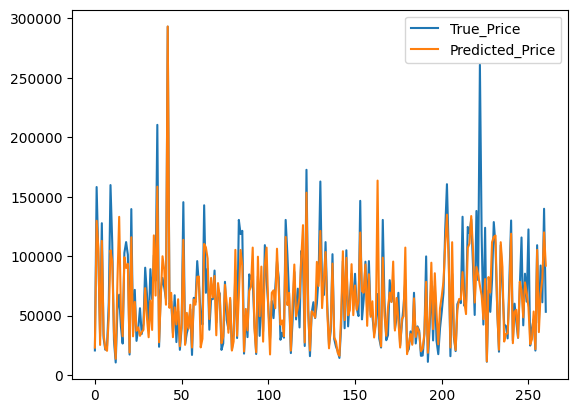

In [ ]:
df_pred1=df_pred.reset_index(drop=True)
df_pred1.plot()